# 2D SETUP FOR PRACTICAL AND IDEAL MODELS

In [13]:
import matplotlib.pyplot as plt
import numpy as np 
import cmath
import random
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.art3d as art3d

from Functions import *

In [14]:
#============== System parameters
Nt = 1
nIRSrow = 6
nIRScol = nIRSrow
Ns = nIRSrow*nIRScol
K = 4
# gamma = db2pow(20)
f = 2.4e9
c = 3e8
Lambda = c/f
halfLambda = 0.5*Lambda
quarterLambda = 0.25*Lambda
BW = 50e6
NF = 10
noise = -174+10*np.log10(BW) + NF
# N0 = db2pow(-174-30)
# sigma = np.sqrt(B*N0)
# epsilon = 1e-3
# Xi = 0.001
# relChange = 1e3
# iIter = 0
# objSeq = []

GRID_RADIUS = 50
BASE_STATION_POSITION = (0, 0)
TRANSMIT_POWER_WATTS = 4 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
# FADING_STD_DEV = 3
PATH_LOSS_EXPONENT = 2.2 #path loss exponent (direct)
BETA = 2.8 #path loss exponent (indirect)
ZETA = 3.8
BANDWIDTH = 50*(10**6) #in Hz
m = 1
omega = np.sqrt(0.5)

IRS_POSITION = (15,20)
NUM_SIMULATIONS = 10

h_dk_3d = []
h_rk_3d = []
h_rk_transpose_3d = []
G_3d = []

# Perform simulations
for i in range(NUM_SIMULATIONS):

    # Generate the Rayleigh Fading Channel for each user (h_dk)
    h_dk1 = []
    fading1 = []
    for user in range(K):
        fading1.append(generate_rayleigh_fading_channel(Nt, FADING_STD_MEAN, FADING_STD_DEV))
    h_dk1 = np.array(fading1)
    h_dk1 = h_dk1.reshape(Nt,K)
    h_dk_3d.append(h_dk1)
    
    # Generate the Nakagami Channel from each user to the IRS (h_rk)
    h_rk1 = []
    fading = []
    for user in range(K):
        fading.append(generate_nakagami_samples(m, omega, Ns))
    h_rk1 = np.array(fading)
    h_rk1 = h_rk1.reshape(Ns,K)
    h_rk_3d.append(h_rk1)
    
    h_rk_conj = np.conj(h_rk1)
    h_rk_transpose1 = np.transpose(h_rk_conj)
    h_rk_transpose_3d.append(h_rk_transpose1)
    
    # Generate the Nakagami Channel from base_station to the IRS (G)
    G1 = []
    fading2 = []
    for element in range(Ns):
        fading2.append(generate_nakagami_samples(m, omega, Nt))
    G1 = np.array(fading2)
    G_3d.append(G1)

# Convert 3D arrays to 2D arrays by averaging along axis 0
h_dk = (np.mean(h_dk_3d, axis=0))
h_rk = (np.mean(h_rk_3d, axis=0))
h_rk_transpose = (np.mean(h_rk_transpose_3d, axis=0))
G = (np.mean(G_3d, axis=0))

print("Averaged h_dk: \n", (h_dk))
print()
print("Averaged h_rk: \n", (h_rk_transpose))
print()
print("Averaged G: \n", (G))

Averaged h_dk: 
 [[1.41919555+1.24327003j 0.14003864-0.15641095j 0.47406612+1.77878058j
  0.7475145 +0.77479867j]]

Averaged h_rk: 
 [[-5.66136008e-01+1.98621521e+00j  3.80054385e-01-6.78025924e-01j
  -6.60302413e+00-6.41795723e+00j -2.73729143e+00-4.57777630e-01j
  -1.00955985e+00+1.82352880e+00j -5.25792502e-01-6.02144770e-01j
   4.64739588e+00+6.22447645e+00j -1.01628305e+00-4.05596832e-01j
  -7.89543359e-01-8.55698893e-01j  1.44623703e+00+2.41373445e-01j
  -4.30926710e-01-2.17915333e-01j -1.73956525e+00-9.96470384e-01j
  -9.37102417e-01+1.36475521e+00j -3.81859657e-01+6.77744241e-01j
  -2.51315344e+00+1.75837360e+00j -3.62940753e-01-3.63241814e-01j
   8.44430541e-01+5.91452535e-01j  1.94904458e+00-1.72820677e+00j
  -9.58827297e+00-7.72133872e+00j -8.29790480e-01+4.43147199e-01j
   1.25700886e+00-2.40736978e+00j  1.50852713e+00-2.45848495e+00j
  -1.10605483e+01-2.08252585e+01j  4.24211421e+00+8.94291797e+00j
   2.10500926e+00-1.07791582e+00j  3.78367101e-01+7.45641150e-01j
  -5.5122

In [1]:
# Generate user positions
USER_POSITION = (-20,0)
user_positions = generate_station_positions_2D(USER_POSITION)
# Additional positions
additional_positions = [(0, -20), (20, 0), (0,20)]
# Combine all positions
all_positions = [USER_POSITION] + additional_positions
user_positions = np.array(all_positions)
print('User positions:'"\n")
loc_U = user_positions
print(loc_U)

# # Generate user positions
# user_positions = generate_user_positions_2D(K, GRID_RADIUS)
# print('User positions:'"\n", user_positions)
# print()
# loc_U = user_positions

# Generate antennas position
AP_position = generate_station_positions_2D(BASE_STATION_POSITION)
xt, yt = AP_position[0]

# Generate IRS position
irs_position = generate_IRS_2D(IRS_POSITION)
xs, ys = irs_position[0]

tx_ant_coords = generate_transmit_antenna_coordinates_2D(Nt, xt, yt, halfLambda, quarterLambda)
loc_T = tx_ant_coords
print('Transmit antenna(e) coordinates:'"\n", loc_T) 
print()

irs_coords = generate_irs_coordinates_2D(xs, ys, nIRSrow, nIRScol, halfLambda, quarterLambda)
loc_S = irs_coords
print('IRS elements coordinates:'"\n", loc_S) 
print()

dTU, dSU, dTS = calculate_distances_3D(loc_U, loc_T, loc_S)

# dTU = compute_distances(loc_U, loc_T)
# dSU = compute_distances(loc_U, loc_S)
# dTS = compute_distances(loc_S, loc_T)

# Reshapiing the distance from antennas/BS to user
dTU = dTU.reshape(Nt,K)
# Compute row-wise averages
dSU = np.mean(dSU, axis=1, keepdims=True)
dSU = dSU.reshape(1,K)
# Compute the sum of elements in each row
dTS = np.mean(dTS, axis=1)
# Compute the average of row sums
dTS = np.mean(dTS)

print('Distances b/w the antennas and the users:'"\n", dTU)
print(np.shape(dTU))
print()
print('Distances b/w the IRS/IRS elements and the users:'"\n", dSU)
print(np.shape(dSU))
print()
print('Distances b/w the antennas and the IRS/IRS elements:'"\n", dTS)
print()

# Plot the grid, base station, and user positions
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), GRID_RADIUS, edgecolor='black', facecolor='none')
ax.add_patch(circle)
plt.scatter(0, 0, color='red', marker='s', label='Base Station')
plt.scatter(IRS_POSITION[0], IRS_POSITION[1], color='green', marker='s', label='IRS')
plt.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wireless Network Environment')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# # Plot the 3D grid, base station, IRS, and user positions
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xt, yt, color='red', marker='*', label='Base Station')
# ax.scatter(IRS_POSITION[0], IRS_POSITION[1], color='green', marker='s', label='IRS')
# ax.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o', label='User')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_title('Wireless Network Environment')
# ax.legend()
# ax.grid(True)

# # Draw the circle in the x-y plane
# circle = plt.Circle((xt, yt), (GRID_RADIUS), edgecolor='black', facecolor='none')
# ax.add_patch(circle)
# art3d.pathpatch_2d_to_3d(circle, z=0, zdir='z')  # Add the circle to the x-y plane at z=zt
# plt.show()

NameError: name 'generate_station_positions_2D' is not defined

# SISO IDEAL PHASE SHIFT MODEL (MULTIPLE USERS)

In [16]:
RATE_THRESHOLD = 150e6

# Initialize an empty list to store theta_n values for each i
theta_n_values_complex = []

for i in range(K):
    theta_n_i = []
    for j in range(Ns):
        # theta_n = np.angle(h_rk[j][i]) - np.angle(G[j][0])
        theta_n = - np.angle(h_rk[j][i]) - np.angle(G[j][0])
        # Adjust theta_n to lie within the range (-π, π)
        theta_n = (theta_n + np.pi) % (2 * np.pi) - np.pi
        theta_n_i.append(theta_n)
    theta_n_values_complex.append(1 * np.exp(1j * np.array(theta_n_i)))
    
theta_n_values_complex = np.array(theta_n_values_complex)

# print('Theta_n matrix: ',"\n", (theta_n_values_complex))
# print(np.shape(theta_n_values_complex))
# print('h_dk angle: ',"\n", np.angle(h_dk))
# print()

# Initialize an empty list to store diagonal matrices
diagonal_matrices = []

# Transform each row into a diagonal matrix
for row in theta_n_values_complex:
    diagonal_matrix = np.diag(row[:Ns])
    diagonal_matrices.append(diagonal_matrix)

# Convert diagonal_matrices to a NumPy array
diagonal_matrices = np.array(diagonal_matrices)
# print('Diagonal matrix: '"\n", (diagonal_matrices))
# print(np.shape(diagonal_matrices))
# print()

# Initialize an empty list to store the results for each column
results_list = []

# Loop over each row/user in the diagonal_matrices
for row_index in range(diagonal_matrices.shape[0]):
    # Get the corresponding diagonal matrix for the current row/user
    single_row_diag = diagonal_matrices[row_index, :, :]
    # print(single_row_diag)

    # Extract the single column from f_m_transpose using indexing and transpose
    single_row = h_rk_transpose[row_index,:]
    
    # Perform the dot product between f_m_transpose (5, 10) and the current diagonal matrix (10, 10)
    result_inter = np.dot(single_row, single_row_diag)

    # Perform the final matrix multiplication of the result_inter (5, 10) and g (10, 1)
    result = np.dot(result_inter, G)
    results_list.append(result)

# Convert the list of results into a numpy array
results_array = np.array(results_list)

# Convert the list of results into a numpy array
results_array = np.array(results_list)
# print('Results array: '"\n", np.abs(results_array))
# print()
# print('Shape of results array:', results_array.shape) 
# print()
results_array = results_array.reshape(Nt,K)

link_inter = []

for i in range(K):
    # link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i])/(np.sqrt((dTU[0][i])**PATH_LOSS_EXPONENT))) + ((results_array[0][i])/(np.sqrt((dSU[0][i])**BETA * (dTS)**BETA))))
    link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array[0][i])/(np.sqrt((dSU[0][i])**BETA * (dTS)**PATH_LOSS_EXPONENT))))
    link_inter.append(link_inter_value)  # Append the computed value to the list

# Convert the list to a numpy array
link_inter = np.array(np.abs(link_inter))
link_inter_array = link_inter.reshape(1,K)

# Calculate link_budget using the updated link_inter array
link_budget = 10 * np.log10((link_inter_array)**2) + 30 
link_budget = link_budget.reshape(1,K)
# print(link_inter_array)
# print()

#Calculate the noise value
# noise = -133 # in dBm

SNR_matrix = []

# Calculate SNR
for i in range(K):
    SNR = compute_SNR(link_budget[0][i], noise)
    SNR_matrix.append(SNR)

SNR_matrix = np.array(SNR_matrix)
SNR_matrix = SNR_matrix.reshape(1,K)
# print(SNR_matrix)
# print()

# Calculate rate 
rate_matrix = (BW) * compute_rate((SNR_matrix))

outage_probability = 0.0
# # Compute the outage probability
outage_probability = compute_outage_probability(K, rate_matrix.flatten(), RATE_THRESHOLD)

# # Print link budget values
# print('Link Budget: ') 
# for element in link_budget:
#     print(element)
# print(np.shape(link_budget)) 
# print() 

# # Print SNR values
# print('SNR of all users (in dB): ')
# for element in SNR_matrix:
#     print(element)
# print(np.shape(SNR_matrix)) 
# print() 

# Print rate values
print('Rate of all users (in Mbps): ')
for element in rate_matrix:
    print(element/10e6)
print(np.shape(rate_matrix)) 

print()
rate_sum_1 = np.sum(rate_matrix)
print("Sum rate (in Mbps): \n", rate_sum_1/10e6)

print()
print('Outage probability for the simulated environment: '"{:.3f}".format(outage_probability))

Rate of all users (in Mbps): 
[138.25107149 167.98231854 175.14757364 191.82345232]
(1, 4)

Sum rate (in Mbps): 
 673.2044159900511

Outage probability for the simulated environment: 0.000


# SISO IDEAL PHASE SHIFT MODEL WITH DISCRETE PHASES (MULTIPLE USERS)

In [18]:
# Create a set of quantized theta values
B = 2
quantized_theta_set = ((2 * np.pi * np.arange(0, 2**B, 1) / (2**B)) - np.pi)
print('Quantized_theta_set: ',"\n", (quantized_theta_set))

quantized_theta_n_values_complex = []

for i in range(K):
    
    quantized_theta_n_i = []
    
    for j in range(Ns):
        # theta_n =  np.angle(h_rk[j][i]) + np.angle(G[j][0]) - np.angle(h_dk[0][i])
        theta_n = - np.angle(h_rk[j][i]) - np.angle(G[j][0])

        # Adjust theta_n to lie within the range (-π, π)
        theta_n = (theta_n + np.pi) % (2 * np.pi) - np.pi
        
        # Find the nearest quantized theta value
        nearest_quantized_theta = quantized_theta_set[np.argmin(np.abs(theta_n - quantized_theta_set))]

        quantized_theta_n_i.append(nearest_quantized_theta)
    
    quantized_theta_n_values_complex.append(1 * np.exp(1j * np.array(quantized_theta_n_i)))

quantized_theta_n_i = np.array(quantized_theta_n_i)

theta_n_values_complex = np.array(quantized_theta_n_values_complex)
# print('Theta_n matrix: ',"\n", (theta_n_values_complex))
# print(np.shape(theta_n_values_complex))

# quantized_theta_n_values_complex = []
# quantized_theta_n_values_complex.append(1 * np.exp(1j * np.array(quantized_theta_n_i)))
# theta_n_values_complex = np.array(quantized_theta_n_values_complex)
# print('Theta_n matrix: ',"\n", (theta_n_values_complex))
# print(np.shape(theta_n_values_complex))

# Initialize an empty list to store diagonal matrices
diagonal_matrices = []

# Transform each row into a diagonal matrix
for row in theta_n_values_complex:
    diagonal_matrix = np.diag(row[:Ns])
    diagonal_matrices.append(diagonal_matrix)

# Convert diagonal_matrices to a NumPy array
diagonal_matrices = np.array(diagonal_matrices)
# print('Diagonal matrix: '"\n", (diagonal_matrices))
# print(np.shape(diagonal_matrices))

# Initialize an empty list to store the results for each column
results_list = []

# Loop over each row/user in the diagonal_matrices
for row_index in range(diagonal_matrices.shape[0]):
    # Get the corresponding diagonal matrix for the current row/user
    single_row_diag = diagonal_matrices[row_index, :, :]
    # print(single_row_diag)

    # Extract the single column from f_m_transpose using indexing and transpose
    single_row = h_rk_transpose[row_index,:]
    
    # Perform the dot product between f_m_transpose (5, 10) and the current diagonal matrix (10, 10)
    result_inter = np.dot(single_row, single_row_diag)

    # Perform the final matrix multiplication of the result_inter (5, 10) and g (10, 1)
    result = np.dot(result_inter, G)
    results_list.append(result)

# Convert the list of results into a numpy array
results_array = np.array(results_list)
# print('Results array: '"\n", (results_array))
# print()
results_array = results_array.reshape(Nt,K)

link_inter = []

for i in range(K):
    link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array[0][i])/(np.sqrt((dSU[0][i])**BETA * (dTS)**PATH_LOSS_EXPONENT))))
    link_inter.append(link_inter_value)  # Append the computed value to the list

# Convert the list to a numpy array
link_inter = np.array(np.abs(link_inter))
link_inter_array = link_inter.reshape(1,K)

# Calculate link_budget using the updated link_inter array
link_budget = 10 * np.log10((link_inter_array)**2) + 30 
link_budget = link_budget.reshape(1,K)

#Calculate the noise value
# noise = -133 # in dBm

SNR_matrix = []

# Calculate SNR
for i in range(K):
    SNR = compute_SNR(link_budget[0][i], noise)
    SNR_matrix.append(SNR)

SNR_matrix = np.array(SNR_matrix)
SNR_matrix = SNR_matrix.reshape(1,K)

# Calculate rate 
rate_matrix = (BW) * compute_rate((SNR_matrix))

outage_probability = 0.0
# # Compute the outage probability
outage_probability = compute_outage_probability(K, rate_matrix.flatten(), RATE_THRESHOLD)

# # Print link budget values
# print('Link Budget: ') 
# for element in link_budget:
#     print(element)
# print(np.shape(link_budget)) 
# print()

# Compute average outage probability
print()
rate_sum_2 = np.sum(rate_matrix)
print("Sum rate (in Mbps):\n", rate_sum_2/10e6)

# Compute average outage probability
print()
print('Outage probability for the simulated environment: '"{:.5f}".format(outage_probability))

print()
print('Percentage difference: ', (rate_sum_1 - rate_sum_2)*100/ rate_sum_1)

Quantized_theta_set:  
 [-3.14159265 -1.57079633  0.          1.57079633]

Sum rate (in Mbps):
 641.4518328212387

Outage probability for the simulated environment: 0.00000

Percentage difference:  4.7166332267911955


# SISO PRACTICAL PHASE-DEPENDENT AMPLITUDE PHASE SHIFT MODEL WITH CONTINUOUS PHASE SHIFTS (MULTIPLE USERS)

In [19]:
# Practical phase shift model parameters
beta_min = 0.2
k = 1.6
phi = 0.43 * np.pi

theta_n_values_complex = []
theta_n_vals = []

for i in range(K):
    beta_n = []
    theta_n_i = []
    for j in range(Ns):
        # theta_n =  np.angle(h_rk[j][i]) + np.angle(G[j][0]) - np.angle(h_dk[0][i])
        theta_n = - np.angle(h_rk[j][i]) - np.angle(G[j][0])
        
        # Adjust theta_n to lie within the range (-π, π)
        theta_n = (theta_n + np.pi) % (2 * np.pi) - np.pi
        theta_n_i.append(theta_n)
        
        beta_theta_n = ((1 - beta_min) * ((np.sin(theta_n - phi) + 1) / 2) ** k + beta_min)
        beta_n.append(beta_theta_n)
    
    theta_n_vals.append(theta_n_i)
    theta_n_values_complex.append(np.array(beta_n) * np.exp(1j * np.array(theta_n_i)))
    
theta_n_values_complex = np.array(theta_n_values_complex)

# Initialize an empty list to store diagonal matrices
diagonal_matrices = []

# Transform each row into a diagonal matrix
for row in theta_n_values_complex:
    diagonal_matrix = np.diag(row[:Ns])
    diagonal_matrices.append(diagonal_matrix)

# Convert diagonal_matrices to a NumPy array
diagonal_matrices = np.array(diagonal_matrices)

# Initialize an empty list to store the results for each column
results_list = []

# Loop over each row/user in the diagonal_matrices
for row_index in range(diagonal_matrices.shape[0]):
    # Get the corresponding diagonal matrix for the current row/user
    single_row_diag = diagonal_matrices[row_index, :, :]
    # print(single_row_diag)

    # Extract the single column from f_m_transpose using indexing and transpose
    single_row = h_rk_transpose[row_index,:]
    
    # Perform the dot product between f_m_transpose (5, 10) and the current diagonal matrix (10, 10)
    result_inter = np.dot(single_row, single_row_diag)

    # Perform the final matrix multiplication of the result_inter (5, 10) and g (10, 1)
    result = np.dot(result_inter, G)
    results_list.append(result)

# Convert the list of results into a numpy array
results_array = np.array(results_list)
results_array = results_array.reshape(1,K)
# print('Results array: '"\n", (results_array))
# print()

link_inter = []

for i in range(K):
    link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array[0][i])/(np.sqrt((dSU[0][i])**BETA * (dTS)**PATH_LOSS_EXPONENT))))
    link_inter.append(link_inter_value)  # Append the computed value to the list

# Convert the list to a numpy array
link_inter = np.array(np.abs(link_inter))
link_inter_array = link_inter.reshape(1,K)

# Calculate link_budget using the updated link_inter array
link_budget = 10 * np.log10((link_inter_array)**2) + 30 
link_budget = link_budget.reshape(1,K)

#Calculate the noise value
# noise = -133 # in dBm

SNR_matrix = []

# Calculate SNR
for i in range(K):
    SNR = compute_SNR(link_budget[0][i], noise)
    SNR_matrix.append(SNR)

SNR_matrix = np.array(SNR_matrix)
SNR_matrix = SNR_matrix.reshape(1,K)

# Calculate rate 
rate_matrix = (BW)*compute_rate((SNR_matrix))

outage_probability = 0.0
# # Compute the outage probability
outage_probability = compute_outage_probability(K, rate_matrix.flatten(), RATE_THRESHOLD)

rate_sum_3 = np.sum(rate_matrix)
print("Sum rate (in Mbps): \n", rate_sum_3/10e6)

print()
print('Outage probability for the simulated environment: '"{:.5f}".format(outage_probability))

print()
print('Percentage difference: ', (rate_sum_1 - rate_sum_3)*100/ rate_sum_1)

Sum rate (in Mbps): 
 632.5114535156462

Outage probability for the simulated environment: 0.00000

Percentage difference:  6.044666598712015


# SISO PRACTICAL PHASE-DEPENDENT AMPLITUDE PHASE SHIFT MODEL WITH QUANTIZED PHASE SHIFTS (MULTIPLE USERS)

In [20]:
# Create a set of quantized theta values
B = 2
quantized_theta_set = ((2 * np.pi * np.arange(0, 2**B, 1) / (2**B)) - np.pi)
print('Quantized_theta_set: ',"\n", (quantized_theta_set))

# Initialize an empty list to store quantized theta_n values for each i
quantized_theta_n_values_complex = []

for i in range(K):
    
    beta_n = []
    quantized_theta_n_i = []
    
    for j in range(Ns):
        # theta_n =  np.angle(G[j][0] * h_dk[0][i]) - np.angle(h_rk[j][i])
        # theta_n =  np.angle(h_rk[j][i]) + np.angle(G[j][0]) - np.angle(h_dk[0][i])
        theta_n = - np.angle(h_rk[j][i]) - np.angle(G[j][0])
        
        # Adjust theta_n to lie within the range (-π, π)
        theta_n = (theta_n + np.pi) % (2 * np.pi) - np.pi
        
        # Find the nearest quantized theta value
        nearest_quantized_theta_new = quantized_theta_set[np.argmin(np.abs(theta_n - quantized_theta_set))]
        
        quantized_theta_n_i.append(nearest_quantized_theta_new)
        
        beta_theta_n = ((1 - beta_min) * ((np.sin(nearest_quantized_theta_new - phi) + 1) / 2) ** k + beta_min)
        beta_n.append(beta_theta_n)
    
    quantized_theta_n_values_complex.append(np.array(beta_n) * np.exp(1j * np.array(quantized_theta_n_i)))
    
theta_n_values_complex = np.array(quantized_theta_n_values_complex)

# Initialize an empty list to store diagonal matrices
diagonal_matrices = []

# Transform each row into a diagonal matrix
for row in theta_n_values_complex:
    diagonal_matrix = np.diag(row[:Ns])
    diagonal_matrices.append(diagonal_matrix)

# Convert diagonal_matrices to a NumPy array
diagonal_matrices = np.array(diagonal_matrices)
# print('Diagonal matrix: '"\n", (diagonal_matrices))
# print(np.shape(diagonal_matrices))

# Initialize an empty list to store the results for each column
results_list = []

# Loop over each row/user in the diagonal_matrices
for row_index in range(diagonal_matrices.shape[0]):
    # Get the corresponding diagonal matrix for the current row/user
    single_row_diag = diagonal_matrices[row_index, :, :]
    # print(single_row_diag)

    # Extract the single column from f_m_transpose using indexing and transpose
    single_row = h_rk_transpose[row_index,:]
    
    # Perform the dot product between f_m_transpose (5, 10) and the current diagonal matrix (10, 10)
    result_inter = np.dot(single_row, single_row_diag)

    # Perform the final matrix multiplication of the result_inter (5, 10) and g (10, 1)
    result = np.dot(result_inter, G)
    results_list.append(result)

# Convert the list of results into a numpy array
results_array = np.array(results_list)
results_array = results_array.reshape(Nt,K)
# print('Results array: '"\n", (results_array))
# print()

link_inter = []

for i in range(K):
    link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array[0][i])/(np.sqrt((dSU[0][i])**BETA * (dTS)**PATH_LOSS_EXPONENT))))
    link_inter.append(link_inter_value)  # Append the computed value to the list

# Convert the list to a numpy array
link_inter = np.array(np.abs(link_inter))
link_inter_array = link_inter.reshape(1,K)

# Calculate link_budget using the updated link_inter array
link_budget = 10 * np.log10((link_inter_array)**2) + 30 
link_budget = link_budget.reshape(1,K)

#Calculate the noise value
# noise = -133 # in dBm

SNR_matrix = []

# Calculate SNR
for i in range(K):
    SNR = compute_SNR(link_budget[0][i], noise)
    SNR_matrix.append(SNR)

SNR_matrix = np.array(SNR_matrix)
SNR_matrix = SNR_matrix.reshape(1,K)

# Calculate rate 
rate_matrix = (BW)*compute_rate((SNR_matrix))

# # Compute the outage probability
outage_probability = 0.0
outage_probability = compute_outage_probability(K, rate_matrix.flatten(), RATE_THRESHOLD)

print()
rate_sum_4 = np.sum(rate_matrix)
print("Sum rate (in Mbps): \n", rate_sum_4/10e6)

print()
print('Outage probability for the simulated environment: '"{:.5f}".format(outage_probability))

print()
print('Percentage difference: ', (rate_sum_3 - rate_sum_4)*100/ rate_sum_3)

Quantized_theta_set:  
 [-3.14159265 -1.57079633  0.          1.57079633]

Sum rate (in Mbps): 
 614.6060431532126

Outage probability for the simulated environment: 0.00000

Percentage difference:  2.830843657124496


# SISO IDEAL PHASE SHIFT MODEL WITH CONTINUOUS PHASE SHIFTS AND ELEMENT SHARING (MULTIPLE USERS)

In [21]:
# Initialize an empty list to store theta_n values for each i
theta_n_values_complex = []

# Calculate inc based on Ns and K
inc = int(Ns/K)

for i in range(K):
    theta_n_i = []

    for j in range(inc * i, inc * (i + 1)):
        theta_n = np.angle(h_rk[j][i]) + np.angle(G[j][0]) - np.angle(h_dk[0][i])
        # Adjust theta_n to lie within the range (-π, π)
        theta_n = (theta_n + np.pi) % (2 * np.pi) - np.pi
        theta_n_i.append(theta_n)

    theta_n_values_complex.append(1 * np.exp(-1j * np.array(theta_n_i)))

theta_n_values_complex = np.array(theta_n_values_complex)

# print('Theta_n matrix: ',"\n", theta_n_values_complex)
# print(np.shape(theta_n_values_complex))
# print()  

# Initialize an empty list to store diagonal matrices
diagonal_matrices = []

# Transform each row into a diagonal matrix
for row in theta_n_values_complex:
    diagonal_matrix = np.diag(row[:Ns])
    diagonal_matrices.append(diagonal_matrix)

# Convert diagonal_matrices to a NumPy array
diagonal_matrices = np.array(diagonal_matrices)
# print('Diagonal matrix: '"\n", (diagonal_matrices))
# print(np.shape(diagonal_matrices))
# print()

results_list = []

for row_index in range(diagonal_matrices.shape[0]):
    # Get the corresponding diagonal matrix for the current row/user is 1x1
    single_row_diag = diagonal_matrices[row_index]

    # Calculate the starting and ending indices for slicing based on row_index
    start_index = row_index * inc
    end_index = start_index + inc

    # Extract the single column from h_rk_transpose using slicing and transpose
    single_row = h_rk_transpose[row_index, start_index:end_index]
    
    # Reshape the single_row to (1, inc)
    single_row = single_row.reshape(1, inc)
    
    # Perform the dot product between f_m_transpose and the current diagonal matrix 
    result_inter = np.dot(single_row, single_row_diag)

    # Perform the final matrix multiplication of result_inter (1, 4) and a subset of G (4, 1)
    subset_G = G[start_index:end_index]
    result = np.dot(result_inter, subset_G)
    results_list.append(result)

# Convert the list of results into a numpy array
results_array = np.array(results_list)
results_array = results_array.reshape(1,K)
# print('Results array: '"\n", (results_array))
# print()

link_inter = []

for i in range(K):
    link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array[0][i])/(np.sqrt((dSU[0][i])**BETA * (dTS)**PATH_LOSS_EXPONENT))))
    link_inter.append(link_inter_value)  # Append the computed value to the list

# Convert the list to a numpy array
link_inter = np.array(np.abs(link_inter))
link_inter_array = link_inter.reshape(1,K)

# Calculate link_budget using the updated link_inter array
link_budget = 10 * np.log10((link_inter_array)**2) + 30 
link_budget = link_budget.reshape(1,K)

#Calculate the noise value
# noise = -133 # in dBm

SNR_matrix = []

# Calculate SNR
for i in range(K):
    SNR = compute_SNR(link_budget[0][i], noise)
    SNR_matrix.append(SNR)

SNR_matrix = np.array(SNR_matrix)
SNR_matrix = SNR_matrix.reshape(1,K)

# Calculate rate 
rate_matrix = (BW)*compute_rate((SNR_matrix))

outage_probability = 0.0
# # Compute the outage probability
outage_probability = compute_outage_probability(K, rate_matrix.flatten(), RATE_THRESHOLD)

# # Print link budget values
# print('Link Budget: ') 
# for element in link_budget:
#     print(element)
# print(np.shape(link_budget)) 
# print() 

# # Print SNR values
# print('SNR of all users (in dB): ')
# for element in SNR_matrix:
#     print(element)
# print(np.shape(SNR_matrix)) 
# print() 

# Print rate values
# print('Rate of all users (in bps/Hz): ')
# for element in rate_matrix:
#     print(element)
# print(np.shape(rate_matrix)) 

rate_sum_5 = np.sum(rate_matrix)
print("Sum rate (in Mbps): \n", rate_sum_5/10e6)

print()
print('Outage probability for the simulated environment: '"{:.5f}".format(outage_probability))

print()
print('Percentage difference: ', (rate_sum_1 - rate_sum_5)*100/ rate_sum_1)

Sum rate (in Mbps): 
 521.7400667967912

Outage probability for the simulated environment: 0.00000

Percentage difference:  22.499013018283325


# SISO IDEAL PHASE SHIFT MODEL WITH DISCRETE PHASE SHIFTS AND ELEMENT SHARING (MULTIPLE USERS)

In [22]:
# Create a set of quantized theta values
B = 2
quantized_theta_set = ((2 * np.pi * np.arange(0, 2**B, 1) / (2**B)) - np.pi)
print('Quantized_theta_set: ',"\n", (quantized_theta_set))

# Initialize an empty list to store theta_n values for each i
theta_n_values_complex = []
inc = int(Ns/K)

for i in range(K):
    theta_n_i = []

    for j in range(i * inc, (i + 1) * inc):
        theta_n = -np.angle(h_rk[j][i]) - np.angle(G[j][0])

        # Adjust theta_n to lie within the range (-π, π)
        theta_n = (theta_n + np.pi) % (2 * np.pi) - np.pi

        # Find the nearest quantized theta value
        nearest_quantized_theta_new = quantized_theta_set[np.argmin(np.abs(theta_n - quantized_theta_set))]
        theta_n_i.append(nearest_quantized_theta_new)

    theta_n_values_complex.append(1 * np.exp(1j * np.array(theta_n_i)))

theta_n_values_complex = np.array(theta_n_values_complex)

# print('Theta_n matrix: ',"\n", theta_n_values_complex)
# print(np.shape(theta_n_values_complex))
# print()  # (12,1)

# Initialize an empty list to store diagonal matrices
diagonal_matrices = []

# Transform each row into a diagonal matrix
for row in theta_n_values_complex:
    diagonal_matrix = np.diag(row[:Ns])
    diagonal_matrices.append(diagonal_matrix)

# Convert diagonal_matrices to a NumPy array
diagonal_matrices = np.array(diagonal_matrices)
# print('Diagonal matrix: '"\n", (diagonal_matrices))
# print(np.shape(diagonal_matrices))
# print()

results_list = []

for row_index in range(diagonal_matrices.shape[0]):
    # Get the corresponding diagonal matrix for the current row/user is 1x1
    single_row_diag = diagonal_matrices[row_index]

    # Calculate the starting and ending indices for slicing based on row_index
    start_index = row_index * inc
    end_index = start_index + inc

    # Extract the single column from h_rk_transpose using slicing and transpose
    single_row = h_rk_transpose[row_index, start_index:end_index]
    
    # Reshape the single_row to (1, 4)
    single_row = single_row.reshape(1, inc)
    
    # Perform the dot product between f_m_transpose (5, 10) and the current diagonal matrix (10, 10)
    result_inter = np.dot(single_row, single_row_diag)

    # Perform the final matrix multiplication of result_inter (1, 4) and a subset of G (4, 1)
    subset_G = G[start_index:end_index]
    result = np.dot(result_inter, subset_G)
    results_list.append(result)

# Convert the list of results into a numpy array
results_array = np.array(results_list)

# print('Results array: '"\n", results_array)
# print
# print('Shape of results array:', results_array.shape) 
# print()
results_array = results_array.reshape(Nt,K)
# print('Results array: '"\n", results_array)

link_inter = []

for i in range(K):
    link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array[0][i])/(np.sqrt((dSU[0][i])**BETA * (dTS)**PATH_LOSS_EXPONENT))))
    link_inter.append(link_inter_value)  # Append the computed value to the list

# Convert the list to a numpy array
link_inter = np.array(np.abs(link_inter))
link_inter_array = link_inter.reshape(1,K)

# Calculate link_budget using the updated link_inter array
link_budget = 10 * np.log10((link_inter_array)**2) + 30 
link_budget = link_budget.reshape(1,K)

#Calculate the noise value
# noise = -133 # in dBm

SNR_matrix = []

# Calculate SNR
for i in range(K):
    SNR = compute_SNR(link_budget[0][i], noise)
    SNR_matrix.append(SNR)

SNR_matrix = np.array(SNR_matrix)
SNR_matrix = SNR_matrix.reshape(1,K)

# Calculate rate 
rate_matrix = BW*compute_rate((SNR_matrix))

outage_probability = 0.0
# # Compute the outage probability
outage_probability = compute_outage_probability(K, rate_matrix.flatten(), RATE_THRESHOLD)

# # Print link budget values
# print('Link Budget: ') 
# for element in link_budget:
#     print(element)
# print(np.shape(link_budget)) 
# print() 

# # Print SNR values
# print('SNR of all users (in dB): ')
# for element in SNR_matrix:
#     print(element)
# print(np.shape(SNR_matrix)) 
# print() 

# Print rate values
# print('Rate of all users (in bps/Hz): ')
# for element in rate_matrix:
#     print(element)
# print(np.shape(rate_matrix)) 

print()
rate_sum_6 = np.sum(rate_matrix)
print("Sum rate (in Mbps): \n", rate_sum_6/10e6)

print()
print('Outage probability for the simulated environment: '"{:.5f}".format(outage_probability))

print()
print('Percentage difference: ', np.abs(rate_sum_5 - rate_sum_6)*100/ rate_sum_5)

Quantized_theta_set:  
 [-3.14159265 -1.57079633  0.          1.57079633]

Sum rate (in Mbps): 
 527.281854682168

Outage probability for the simulated environment: 0.00000

Percentage difference:  1.0621741050865594


# SISO PRACTICAL PHASE-DEPENDENT AMPLITUDE PHASE SHIFT MODEL WITH CONINUOUS PHASE SHIFTS AND ELEMENT SHARING (MULTIPLE USERS)

In [23]:
# Practical phase shift model parameters
beta_min = 0.2
k = 1.6
phi = 0.43 * np.pi

# Initialize an empty list to store theta_n values for each i
theta_n_values_complex = []
inc = int(Ns/K)

for i in range(K):
    beta_n = []
    theta_n_i = []

    for j in range(i * inc, (i + 1) * inc):
        theta_n = -np.angle(h_rk[j][i]) - np.angle(G[j][0])

        # Adjust theta_n to lie within the range (-π, π)
        theta_n = (theta_n + np.pi) % (2 * np.pi) - np.pi
        theta_n_i.append(theta_n)

        beta_theta_n = ((1 - beta_min) * ((np.sin(theta_n - phi) + 1) / 2) ** k + beta_min)
        beta_n.append(beta_theta_n)

    theta_n_values_complex.append(np.array(beta_n) * np.exp(1j * np.array(theta_n_i)))

theta_n_values_complex = np.array(theta_n_values_complex)
# print('Theta_n matrix: ',"\n", theta_n_values_complex)
# print(np.shape(theta_n_values_complex))
# print()  # (12,1)

# Initialize an empty list to store diagonal matrices
diagonal_matrices = []

# Transform each row into a diagonal matrix
for row in theta_n_values_complex:
    diagonal_matrix = np.diag(row[:Ns])
    diagonal_matrices.append(diagonal_matrix)

# Convert diagonal_matrices to a NumPy array
diagonal_matrices = np.array(diagonal_matrices)
# print('Diagonal matrix: '"\n", (diagonal_matrices))
# print(np.shape(diagonal_matrices))
print()

results_list = []

for row_index in range(diagonal_matrices.shape[0]):
    # Get the corresponding diagonal matrix for the current row/user is 1x1
    single_row_diag = diagonal_matrices[row_index]

    # Calculate the starting and ending indices for slicing based on row_index
    start_index = row_index * inc
    end_index = start_index + inc

    # Extract the single column from h_rk_transpose using slicing and transpose
    single_row = h_rk_transpose[row_index, start_index:end_index]
    
    # Reshape the single_row to (1, K)
    single_row = single_row.reshape(1, inc)
    
    # Perform the dot product between f_m_transpose (5, 10) and the current diagonal matrix (10, 10)
    result_inter = np.dot(single_row, single_row_diag)

    # Perform the final matrix multiplication of result_inter (1, 4) and a subset of G (4, 1)
    subset_G = G[start_index:end_index]
    result = np.dot(result_inter, subset_G)
    results_list.append(result)

# Convert the list of results into a numpy array
results_array = np.array(results_list)

# print('Shape of results array:', results_array.shape) 
# print()
results_array = results_array.reshape(1,K)
# print('Results array: '"\n", results_array)
# print()

# print('Results array: '"\n", results_array)

link_inter = []

for i in range(K):
    link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array[0][i])/(np.sqrt((dSU[0][i])**BETA * (dTS)**PATH_LOSS_EXPONENT))))
    link_inter.append(link_inter_value)  # Append the computed value to the list

# Convert the list to a numpy array
link_inter = np.array(np.abs(link_inter))
link_inter_array = link_inter.reshape(1,K)

# Calculate link_budget using the updated link_inter array
link_budget = 10 * np.log10((link_inter_array)**2) + 30 
link_budget = link_budget.reshape(1,K)

#Calculate the noise value
# noise = -133 # in dBm

SNR_matrix = []

# Calculate SNR
for i in range(K):
    SNR = compute_SNR(link_budget[0][i], noise)
    SNR_matrix.append(SNR)

SNR_matrix = np.array(SNR_matrix)
SNR_matrix = SNR_matrix.reshape(1,K)

# Calculate rate 
rate_matrix = BW*compute_rate((SNR_matrix))

outage_probability = 0.0
# # Compute the outage probability
outage_probability = compute_outage_probability(K, rate_matrix.flatten(), RATE_THRESHOLD)

# # Print link budget values
# print('Link Budget: ') 
# for element in link_budget:
#     print(element)
# print(np.shape(link_budget)) 
# print() 

# # Print SNR values
# print('SNR of all users (in dB): ')
# for element in SNR_matrix:
#     print(element)
# print(np.shape(SNR_matrix)) 
# print() 

# Print rate values
# print('Rate of all users (in bps/Hz): ')
# for element in rate_matrix:
#     print(element)
# print(np.shape(rate_matrix)) 

rate_sum_7 = np.sum(rate_matrix)
print("Sum rate (in Mbps): \n", rate_sum_7/10e6)

print()
print('Outage probability for the simulated environment: '"{:.5f}".format(outage_probability))

print()
print('Percentage difference: ', (rate_sum_1 - rate_sum_7)*100/ rate_sum_1)


Sum rate (in Mbps): 
 484.05081683479136

Outage probability for the simulated environment: 0.00000

Percentage difference:  28.097498272806206


# SISO PRACTICAL AMPLITUDE-DEPENDENT PHASE SHIFT MODEL WITH DISCRETE PHASE SHIFTS AND ELEMENT SHARING (MULTIPLE USERS)

In [101]:
# Create a set of quantized theta values
B = 2
quantized_theta_set = ((2 * np.pi * np.arange(0, 2**B, 1) / (2**B)) - np.pi)
print('Quantized_theta_set: ',"\n", (quantized_theta_set))

# Initialize an empty list to store theta_n values for each i
theta_n_values_complex = []
inc = int(Ns/K)

for i in range(K):
    theta_n_i = []
    beta_n = []

    for j in range(inc * i, inc * (i + 1)):
        theta_n = -np.angle(h_rk[j][i]) - np.angle(G[j][0])

        # Adjust theta_n to lie within the range (-π, π)
        theta_n = (theta_n + np.pi) % (2 * np.pi) - np.pi

        # Find the nearest quantized theta value
        nearest_quantized_theta_new = quantized_theta_set[np.argmin(np.abs(theta_n - quantized_theta_set))]
        theta_n_i.append(nearest_quantized_theta_new)

        beta_theta_n = ((1 - beta_min) * ((np.sin(nearest_quantized_theta_new - phi) + 1) / 2) ** k + beta_min)
        beta_n.append(beta_theta_n)

    theta_n_values_complex.append(np.array(beta_n) * np.exp(1j * np.array(theta_n_i)))

theta_n_values_complex = np.array(theta_n_values_complex)

# print('Theta_n matrix: ',"\n", theta_n_values_complex)
# print(np.shape(theta_n_values_complex))
# print()  # (12,1)

# Initialize an empty list to store diagonal matrices
diagonal_matrices = []

# Transform each row into a diagonal matrix
for row in theta_n_values_complex:
    diagonal_matrix = np.diag(row[:Ns])
    diagonal_matrices.append(diagonal_matrix)

# Convert diagonal_matrices to a NumPy array
diagonal_matrices = np.array(diagonal_matrices)
# print('Diagonal matrix: '"\n", (diagonal_matrices))
# print(np.shape(diagonal_matrices))
# print()

results_list = []

for row_index in range(diagonal_matrices.shape[0]):
    # Get the corresponding diagonal matrix for the current row/user is 1x1
    single_row_diag = diagonal_matrices[row_index]

    # Calculate the starting and ending indices for slicing based on row_index
    start_index = row_index * inc
    end_index = start_index + inc

    # Extract the single column from h_rk_transpose using slicing and transpose
    single_row = h_rk_transpose[row_index, start_index:end_index]
    
    # Reshape the single_row to (1, inc)
    single_row = single_row.reshape(1, inc)
    
    # Perform the dot product between f_m_transpose (5, 10) and the current diagonal matrix (10, 10)
    result_inter = np.dot(single_row, single_row_diag)

    # Perform the final matrix multiplication of result_inter (1, 4) and a subset of G (4, 1)
    subset_G = G[start_index:end_index]
    result = np.dot(result_inter, subset_G)
    results_list.append(result)

# Convert the list of results into a numpy array
results_array = np.array(results_list)

# print('Results array: '"\n", results_array)
# print
# print('Shape of results array:', results_array.shape) 
# print()
results_array = results_array.reshape(Nt,K)
# print('Results array: '"\n", results_array)

link_inter = []

for i in range(K):
    link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i])/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array[0][i])/(np.sqrt((dSU[0][i])**BETA * (dTS)**PATH_LOSS_EXPONENT))))
    link_inter.append(link_inter_value)  # Append the computed value to the list

# Convert the list to a numpy array
link_inter = np.array(np.abs(link_inter))
link_inter_array = link_inter.reshape(1,K)

# Calculate link_budget using the updated link_inter array
link_budget = 10 * np.log10((link_inter_array)**2) + 30 
link_budget = link_budget.reshape(1,K)

#Calculate the noise value
# noise = -133 # in dBm

SNR_matrix = []

# Calculate SNR
for i in range(K):
    SNR = compute_SNR(link_budget[0][i], noise)
    SNR_matrix.append(SNR)

SNR_matrix = np.array(SNR_matrix)
SNR_matrix = SNR_matrix.reshape(1,K)

# Calculate rate 
rate_matrix = BW*compute_rate((SNR_matrix))

outage_probability = 0.0
# # Compute the outage probability
outage_probability = compute_outage_probability(K, rate_matrix.flatten(), RATE_THRESHOLD)

# # Print link budget values
# print('Link Budget: ') 
# for element in link_budget:
#     print(element)
# print(np.shape(link_budget)) 
# print() 

# # Print SNR values
# print('SNR of all users (in dB): ')
# for element in SNR_matrix:
#     print(element)
# print(np.shape(SNR_matrix)) 
# print() 

# Print rate values
# print('Rate of all users (in bps/Hz): ')
# for element in rate_matrix:
#     print(element)
# print(np.shape(rate_matrix)) 
print()
rate_sum_8 = np.sum(rate_matrix)
print("Sum rate (in Mbps): \n", rate_sum_8/10e6)

print()
print('Outage probability for the simulated environment: '"{:.5f}".format(outage_probability))

print()
print('Percentage difference: ', (rate_sum_7 - rate_sum_8)*100/ rate_sum_7)

Quantized_theta_set:  
 [-3.14159265 -1.57079633  0.          1.57079633]

Sum rate (in Mbps): 
 597.0414097238357

Outage probability for the simulated environment: 0.00000

Percentage difference:  -9.389422276503417


# IRS Relations (For Sum Rates & Outage Probs Vs Number of IRS elements for different B's)

User positions:
 [[-117.91183137  257.66101343    0.        ]
 [-272.59807751 -161.66191684    0.        ]
 [-141.41301643  148.88704261    0.        ]
 [-245.19612231  -20.77765326    0.        ]
 [  50.72580982 -127.6383609     0.        ]
 [  31.58824038 -350.07808035    0.        ]
 [ 171.571027    204.23464987    0.        ]
 [  10.04166702    0.53689416    0.        ]
 [  -9.26575443  -63.58342066    0.        ]
 [-431.30141918  -26.46175696    0.        ]
 [-267.69873847 -180.2012793     0.        ]
 [ -42.16912035  -16.33478669    0.        ]]

Transmit antenna(e) coordinates:
 [[ 0. 20. 10.]]

IRS elements coordinates:
 [[19.9625 -0.0375  5.    ]
 [20.0375 -0.0375  5.    ]
 [19.9625  0.0375  5.    ]
 [20.0375  0.0375  5.    ]]

Distances b/w the antennas and the users:
 [[265.49191566 327.73581417 191.59726243 248.76485966 156.42951573
  371.55834331 251.95043862  24.07587102  84.68791186 433.91198307
  334.42961414  56.55485333]]
(1, 12)

Distances b/w the IRS/IRS elements an

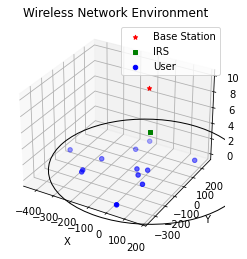

In [66]:
#============== System parameters
Nt = 1
nIRSrow = 2
nIRScol = nIRSrow
Ns = nIRSrow*nIRScol
Ns_max = 30
K = 12
# gamma = db2pow(20)
f = 2e9
c = 3e8
Lambda = c/f
halfLambda = 0.5*Lambda
quarterLambda = 0.25*Lambda
# N0 = db2pow(-174-30)
B = 5
# sigma = np.sqrt(B*N0)
# epsilon = 1e-3
# Xi = 0.001
# relChange = 1e3
# iIter = 0
# objSeq = []

GRID_RADIUS = 500
BASE_STATION_POSITION = (0, 20, 10)
TRANSMIT_POWER_WATTS = 3.98 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
PATH_LOSS_EXPONENT = 3.5 #path loss exponent (direct)
BETA = 2 #path loss exponent (indirect)
BANDWIDTH = 50*(10**6) #in Hz
m = 1
omega = 1.0

IRS_POSITION = (20, 0, 5)

# Generate user positions
user_positions = generate_user_positions_3D(K, GRID_RADIUS)
print('User positions:'"\n", user_positions)
print()
loc_U = user_positions
# print(loc_U)

# Generate antennas position
AP_position = generate_station_positions_3D(BASE_STATION_POSITION)
xt, yt, zt = AP_position[0]

# Generate IRS position
irs_position = generate_IRS_3D(IRS_POSITION)
xs, ys, zs = irs_position[0]

tx_ant_coords = generate_transmit_antenna_coordinates_3D(Nt, xt, yt, zt, halfLambda, quarterLambda)
loc_T = tx_ant_coords
print('Transmit antenna(e) coordinates:'"\n", loc_T) 
print()

irs_coords = generate_irs_coordinates_3D(xs, ys, zs, nIRSrow, nIRScol, halfLambda, quarterLambda)
loc_S = irs_coords
print('IRS elements coordinates:'"\n", loc_S) 
print()

dTU, dSU, dTS = calculate_distances_3D(loc_U, loc_T, loc_S)

# Reshapiing the distance from antennas/BS to user
dTU = dTU.reshape(Nt,K)
# Compute row-wise averages
dSU = np.mean(dSU, axis=1, keepdims=True)
dSU = dSU.reshape(1,K)
# Compute the sum of elements in each row
dTS = np.mean(dTS, axis=1)
# Compute the average of row sums
dTS = np.mean(dTS)

print('Distances b/w the antennas and the users:'"\n", dTU)
print(np.shape(dTU))
print()
print('Distances b/w the IRS/IRS elements and the users:'"\n", dSU)
print(np.shape(dSU))
print()
print('Distances b/w the antennas and the IRS/IRS elements:'"\n", dTS)
print()

# Plot the 3D grid, base station, IRS, and user positions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xt, yt, zt, color='red', marker='*', label='Base Station')
ax.scatter(IRS_POSITION[0], IRS_POSITION[1], IRS_POSITION[2], color='green', marker='s', label='IRS')
ax.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o', label='User')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Wireless Network Environment')
ax.legend()
ax.grid(True)

# Draw the circle in the x-y plane
circle = plt.Circle((xt, yt), (GRID_RADIUS), edgecolor='black', facecolor='none')
ax.add_patch(circle)
art3d.pathpatch_2d_to_3d(circle, z=0, zdir='z')  # Add the circle to the x-y plane at z=zt
plt.show()

In [67]:
NUM_SIMULATIONS = 50
Ns_max = 45

h_dk_3d = []
h_rk_3d = []
h_rk_transpose_3d = []
G_3d = []

# Perform simulations
for i in range(NUM_SIMULATIONS):

    # Generate the Rayleigh Fading Channel for each user (h_dk)
    h_dk1 = []
    fading1 = []
    for user in range(K):
        fading1.append(generate_rayleigh_fading_channel(Nt, FADING_STD_MEAN, FADING_STD_DEV))
    h_dk1 = np.array(fading1)
    h_dk1 = h_dk1.reshape(Nt,K)
    h_dk_3d.append(h_dk1)
    
    # Generate the Nakagami Channel from each user to the IRS (h_rk)
    h_rk1 = []
    fading = []
    for user in range(K):
        fading.append(generate_nakagami_samples(m, omega, Ns_max))
    h_rk1 = np.array(fading)
    h_rk1 = h_rk1.reshape(Ns_max,K)
    h_rk_3d.append(h_rk1)
    
    h_rk_conj = np.conj(h_rk1)
    h_rk_transpose1 = np.transpose(h_rk_conj)
    h_rk_transpose_3d.append(h_rk_transpose1)
    
    # Generate the Nakagami Channel from base_station to the IRS (G)
    G1 = []
    fading2 = []
    for element in range(Ns_max):
        fading2.append(generate_nakagami_samples(m, omega, Nt))
    G1 = np.array(fading2)
    G_3d.append(G1)

print("h_dk: \n", np.shape(h_dk_3d))
print()
print("h_rk: \n", np.shape(h_rk_3d))
print()
print("G: \n", np.shape(G_3d))

h_dk: 
 (50, 1, 12)

h_rk: 
 (50, 45, 12)

G: 
 (50, 45, 1)


In [68]:
qB = np.arange(2,4,1)
N_values = np.arange(5, Ns_max + 1, 1)
RATE_THRESHOLD = 30

# Initialize an empty dictionary to store the results
results_dict_1 = {}
results_dict_2 = {}

for B in qB:
    
    # Create a set of quantized theta values
    quantized_theta_set = ((2 * np.pi * np.arange(0, 2**B, 1) / (2**B)) - np.pi)
    # print('Quantized_theta_set: ',"\n", (quantized_theta_set))
    
    average_outage_probabilities_1 = []
    sum_rates_1 = []

    for Ns in N_values:

        # Extract channel values for the current Ns value
        h_rk_ns_values = [h_rk_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, K)
        G_ns_values = [G_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)
        
        # Initialize list to store individual outage probabilities
        outage_probabilities = []
        
        # Initialize sum-rates for this case
        sum_rate_N = 0  
    
        # Perform simulations
        for s in range(NUM_SIMULATIONS):
            h_dk = h_dk_3d[s]  # Shape: (1, K)
            h_rk = h_rk_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose = np.transpose(np.conj(h_rk))  # Shape: (K, Ns)
            G = G_ns_values[s]  # Shape: (Ns, 1)

            # Initialize an empty list to store theta_n values for each i
            theta_n_values_complex = []
            
            for i in range(K):
                theta_n_i = []
                for j in range(Ns):
                    theta_n = np.angle(h_rk[j][i]) - np.angle(G[j][0])
                    # theta_n = np.angle(h_dk[0][i]) - (np.angle(h_rk[j][i]) + np.angle(G[j][0]))
                
                    # Adjust theta_n to lie within the range (-π, π)
                    theta_n = (theta_n + np.pi) % (2 * np.pi) - np.pi
                    theta_n_i.append(theta_n)
                    
                theta_n_values_complex.append(1 * np.exp(1j * np.array(theta_n_i)))
            
            theta_n_values_complex = np.array(theta_n_values_complex)
            
            # Initialize an empty list to store diagonal matrices
            diagonal_matrices = []
            
            # Transform each row into a diagonal matrix
            for row in theta_n_values_complex:
                diagonal_matrix = np.diag(row[:Ns])
                diagonal_matrices.append(diagonal_matrix)
            
            # Convert diagonal_matrices to a NumPy array
            diagonal_matrices = np.array(diagonal_matrices)
            # print('Diagonal matrix: '"\n", (diagonal_matrices))
            # print(np.shape(diagonal_matrices))
            
            # Initialize an empty list to store the results for each column
            results_list = []
            
            # Loop over each row/user in the diagonal_matrices
            for row_index in range(diagonal_matrices.shape[0]):
                # Get the corresponding diagonal matrix for the current row/user
                single_row_diag = diagonal_matrices[row_index, :, :]
            
                # Extract the single column from f_m_transpose using indexing and transpose
                single_row = h_rk_transpose[row_index,:]
                
                # Perform the dot product between f_m_transpose (5, 10) and the current diagonal matrix (10, 10)
                result_inter = np.dot(single_row, single_row_diag)
            
                # Perform the final matrix multiplication of the result_inter (5, 10) and g (10, 1)
                result = np.dot(result_inter, G)
                results_list.append(result)
            
            # Convert the list of results into a numpy array
            results_array = np.array(results_list)
            results_array = results_array.reshape(1,K)

            # Computing the intermediate link budget (complex result)
            link_inter = []
            
            for i in range(K):
                link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i])/np.sqrt(dTU[0][i])**PATH_LOSS_EXPONENT + (results_array[0][i])/((dSU[0][i])**BETA * (dTS)**BETA)))
                link_inter.append(link_inter_value)  # Append the computed value to the list
            
            # Convert the list to a numpy array
            link_inter = np.array(np.abs(link_inter))
            link_inter_array = link_inter.reshape(1,K)
            
            # Calculate link_budget using the updated link_inter array
            link_budget = 10 * np.log10((link_inter_array)**2) + 30 
            link_budget = link_budget.reshape(1,K)
            
            #Calculate the noise value
            noise = -133 # in dBm
            
            SNR_matrix = []
            
            # Calculate SNR
            for i in range(K):
                SNR = compute_SNR(link_budget[0][i], noise)
                SNR_matrix.append(SNR)
            
            SNR_matrix = np.array(SNR_matrix)
            SNR_matrix = SNR_matrix.reshape(1,K)
            
            # Calculate rate 
            rate_matrix = compute_rate((SNR_matrix))
            rate_matrix_new = rate_matrix.flatten()
            
            # Compute sum-rate for this iteration
            sum_rate_N += np.sum(rate_matrix_new)
            
            # Compute outage probability at each iteration
            outage_probability = compute_outage_probability(K, rate_matrix_new, RATE_THRESHOLD)
            outage_probabilities.append(outage_probability)
    
        # Compute average outage probability for the current N
        average_outage_probability = compute_average_outage_probability(outage_probabilities)
        average_outage_probabilities_1.append(average_outage_probability)
        
        # Append sum-rate for this N to the list
        sum_rates_1.append(sum_rate_N/1000)
        
    # Store the results in the dictionary with N as the key
    results_dict_1[B] = sum_rates_1
    
    # Store the results in the dictionary with N as the key
    results_dict_2[B] = average_outage_probabilities_1

print('done')
print(N_values)

done
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


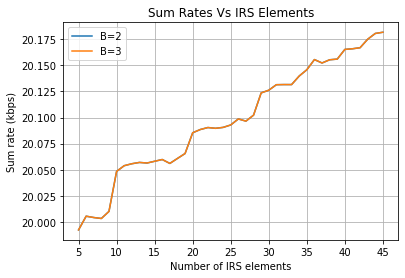

In [69]:
# # Plot the graph for each value of N
# for B, average_outage_probabilities_1 in results_dict_2.items():
#     plt.plot(N_values, average_outage_probabilities_1, label=f'B={B}')

# plt.ylabel('Average Outage Probability')
# plt.xlabel('Number of IRS elements')
# plt.title('Outage Probability Vs IRS Elements')
# plt.legend()
# plt.grid(True)
# plt.show()

# Plot the graph for each value of N
for B, sum_rates_1 in results_dict_1.items():
    plt.plot(N_values, sum_rates_1, label=f'B={B}')

plt.ylabel('Sum rate (kbps)')
plt.xlabel('Number of IRS elements')
plt.title('Sum Rates Vs IRS Elements')
plt.legend()
plt.grid(True)

# new_x_limits = (0, 35)
# new_y_limits = (22, 40)
# plt.xlim(new_x_limits)
# plt.ylim(new_y_limits)

plt.show()

In [70]:
# Initialize the vectors
qB = np.arange(2,4,1)
N_values = np.arange(5, Ns_max + 1, 1)
RATE_THRESHOLD = 30

# Initialize an empty dictionary to store the results
results_dict_3 = {}
results_dict_4 = {}

for B in qB:
    
    # Create a set of quantized theta values
    quantized_theta_set = ((2 * np.pi * np.arange(0, 2**B, 1) / (2**B)) - np.pi)
    # print('Quantized_theta_set: ',"\n", (quantized_theta_set))
    
    average_outage_probabilities_2 = []
    sum_rates_2 = []

    for Ns in N_values:

        # Extract channel values for the current Ns value
        h_rk_ns_values = [h_rk_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, K)
        G_ns_values = [G_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)
        
        # Initialize list to store individual outage probabilities
        outage_probabilities = []
        
        # Initialize sum-rates for this case
        sum_rate_N = 0  
    
        # Perform simulations
        for s in range(NUM_SIMULATIONS):
            h_dk = h_dk_3d[s]  # Shape: (1, K)
            h_rk = h_rk_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose = np.transpose(np.conj(h_rk))  # Shape: (K, Ns)
            G = G_ns_values[s]  # Shape: (Ns, 1)

            quantized_theta_n_values_complex = []
            
            for i in range(K):
                
                quantized_theta_n_i = []
                
                for j in range(Ns):
                    theta_n = np.angle(h_rk[j][i] * G[j][0]) - np.angle(h_dk[0][i])
                    # theta_n = np.angle(h_dk[0][i]) - (np.angle(h_rk[j][i]) + np.angle(G[j][0]))
                    
                    # Find the nearest quantized theta value
                    nearest_quantized_theta = quantized_theta_set[np.argmin(np.abs(theta_n - quantized_theta_set))]
                    
                    # Adjust theta_n to lie within the range (-π, π)
                    nearest_quantized_theta_new = (nearest_quantized_theta + np.pi) % (2 * np.pi) - np.pi
            
                    quantized_theta_n_i.append(nearest_quantized_theta_new)
                
                quantized_theta_n_values_complex.append(1 * np.exp(1j * np.array(quantized_theta_n_i)))
                        
            theta_n_values_complex = np.array(quantized_theta_n_values_complex)
            
            # Initialize an empty list to store diagonal matrices
            diagonal_matrices = []
            
            # Transform each row into a diagonal matrix
            for row in theta_n_values_complex:
                diagonal_matrix = np.diag(row[:Ns])
                diagonal_matrices.append(diagonal_matrix)
            
            # Convert diagonal_matrices to a NumPy array
            diagonal_matrices = np.array(diagonal_matrices)
            # print('Diagonal matrix: '"\n", (diagonal_matrices))
            # print(np.shape(diagonal_matrices))
            
            # Initialize an empty list to store the results for each column
            results_list = []
            
            # Loop over each row/user in the diagonal_matrices
            for row_index in range(diagonal_matrices.shape[0]):
                # Get the corresponding diagonal matrix for the current row/user
                single_row_diag = diagonal_matrices[row_index, :, :]
            
                # Extract the single column from f_m_transpose using indexing and transpose
                single_row = h_rk_transpose[row_index,:]
                
                # Perform the dot product between f_m_transpose (5, 10) and the current diagonal matrix (10, 10)
                result_inter = np.dot(single_row, single_row_diag)
            
                # Perform the final matrix multiplication of the result_inter (5, 10) and g (10, 1)
                result = np.dot(result_inter, G)
                results_list.append(result)
            
            # Convert the list of results into a numpy array
            results_array = np.array(results_list)
            results_array = results_array.reshape(1,K)

            # Computing the intermediate link budget (complex result)
            link_inter = []
            
            for i in range(K):
                link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i])/np.sqrt(dTU[0][i])**PATH_LOSS_EXPONENT + (results_array[0][i])/((dSU[0][i])**BETA * (dTS)**BETA)))
                link_inter.append(link_inter_value)  # Append the computed value to the list
            
            # Convert the list to a numpy array
            link_inter = np.array(np.abs(link_inter))
            link_inter_array = link_inter.reshape(1,K)
            
            # Calculate link_budget using the updated link_inter array
            link_budget = 10 * np.log10((link_inter_array)**2) + 30 
            link_budget = link_budget.reshape(1,K)
            
            #Calculate the noise value
            noise = -133 # in dBm
            
            SNR_matrix = []
            
            # Calculate SNR
            for i in range(K):
                SNR = compute_SNR(link_budget[0][i], noise)
                SNR_matrix.append(SNR)
            
            SNR_matrix = np.array(SNR_matrix)
            SNR_matrix = SNR_matrix.reshape(1,K)
            
            # Calculate rate 
            rate_matrix = compute_rate((SNR_matrix))
            rate_matrix_new = rate_matrix.flatten()
            
            # Compute sum-rate for this iteration
            sum_rate_N += np.sum(rate_matrix_new)
            
            # Compute outage probability at each iteration
            outage_probability = compute_outage_probability(K, rate_matrix_new, RATE_THRESHOLD)
            outage_probabilities.append(outage_probability)
    
        # Compute average outage probability for the current N
        average_outage_probability = compute_average_outage_probability(outage_probabilities)
        average_outage_probabilities_2.append(average_outage_probability)
        
        # Append sum-rate for this N to the list
        sum_rates_2.append(sum_rate_N/1000)
        
    # Store the results in the dictionary with N as the key
    results_dict_3[B] = sum_rates_2
    
    # Store the results in the dictionary with N as the key
    results_dict_4[B] = average_outage_probabilities_2

print('done')

done


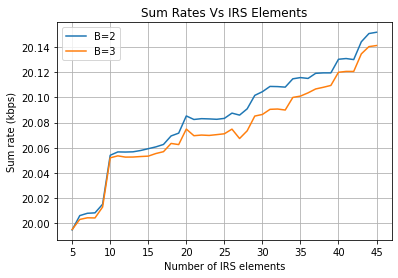

In [71]:
# # Plot the graph for each value of N
# for B, average_outage_probabilities_2 in results_dict_4.items():
#     plt.plot(N_values, average_outage_probabilities_2, label=f'B={B}')

# plt.ylabel('Average Outage Probability')
# plt.xlabel('Number of IRS elements')
# plt.title('Outage Probability Vs IRS Elements')
# plt.legend()
# plt.grid(True)
# plt.show()

# Plot the graph for each value of N
for B, sum_rates_2 in results_dict_3.items():
    plt.plot(N_values, sum_rates_2, label=f'B={B}')

plt.ylabel('Sum rate (kbps)')
plt.xlabel('Number of IRS elements')
plt.title('Sum Rates Vs IRS Elements')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
# Initialize the vectors
qB = np.arange(2,4,1)
N_values = np.arange(5, Ns_max + 1, 1)
RATE_THRESHOLD = 30

# Practical phase shift model parameters
beta_min = 0.2
k = 1.6
phi = 0.43 * np.pi

# Initialize an empty dictionary to store the results
results_dict_5 = {}
results_dict_6 = {}

for B in qB:
    
    # Create a set of quantized theta values
    quantized_theta_set = ((2 * np.pi * np.arange(0, 2**B, 1) / (2**B)) - np.pi)
    # print('Quantized_theta_set: ',"\n", (quantized_theta_set))
    
    average_outage_probabilities_3 = []
    sum_rates_3 = []

    for Ns in N_values:

        # Extract channel values for the current Ns value
        h_rk_ns_values = [h_rk_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, K)
        G_ns_values = [G_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)
        
        # Initialize list to store individual outage probabilities
        outage_probabilities = []
        
        # Initialize sum-rates for this case
        sum_rate_N = 0  
    
        # Perform simulations
        for s in range(NUM_SIMULATIONS):
            h_dk = h_dk_3d[s]  # Shape: (1, K)
            h_rk = h_rk_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose = np.transpose(np.conj(h_rk))  # Shape: (K, Ns)
            G = G_ns_values[s]  # Shape: (Ns, 1)

            theta_n_values_complex = []
            theta_n_vals = []
            
            for i in range(K):
                beta_n = []
                theta_n_i = []
                for j in range(Ns):
                    theta_n = np.angle(h_rk[j][i]) - np.angle(G[j][0])
                    # theta_n = np.angle(h_dk[0][i]) - (np.angle(h_rk[j][i]) + np.angle(G[j][0]))
                    
                    # Adjust theta_n to lie within the range (-π, π)
                    theta_n = (theta_n + np.pi) % (2 * np.pi) - np.pi
                    theta_n_i.append(theta_n)
                    
                    beta_theta_n = ((1 - beta_min) * ((np.sin(theta_n - phi) + 1) / 2) ** k + beta_min)
                    beta_theta_n = np.clip(beta_theta_n, 0, 1)
                    beta_n.append(beta_theta_n)
                
                theta_n_vals.append(theta_n_i)
                theta_n_values_complex.append(np.array(beta_n) * np.exp(1j * np.array(theta_n_i)))
                
            theta_n_values_complex = np.array(theta_n_values_complex)
            
            # Initialize an empty list to store diagonal matrices
            diagonal_matrices = []
            
            # Transform each row into a diagonal matrix
            for row in theta_n_values_complex:
                diagonal_matrix = np.diag(row[:Ns])
                diagonal_matrices.append(diagonal_matrix)
            
            # Convert diagonal_matrices to a NumPy array
            diagonal_matrices = np.array(diagonal_matrices)
            # print('Diagonal matrix: '"\n", (diagonal_matrices))
            # print(np.shape(diagonal_matrices))
            
            # Initialize an empty list to store the results for each column
            results_list = []
            
            # Loop over each row/user in the diagonal_matrices
            for row_index in range(diagonal_matrices.shape[0]):
                # Get the corresponding diagonal matrix for the current row/user
                single_row_diag = diagonal_matrices[row_index, :, :]
            
                # Extract the single column from f_m_transpose using indexing and transpose
                single_row = h_rk_transpose[row_index,:]
                
                # Perform the dot product between f_m_transpose (5, 10) and the current diagonal matrix (10, 10)
                result_inter = np.dot(single_row, single_row_diag)
            
                # Perform the final matrix multiplication of the result_inter (5, 10) and g (10, 1)
                result = np.dot(result_inter, G)
                results_list.append(result)
            
            # Convert the list of results into a numpy array
            results_array = np.array(results_list)
            results_array = results_array.reshape(1,K)

            # Computing the intermediate link budget (complex result)
            link_inter = []
            
            for i in range(K):
                link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i])/np.sqrt(dTU[0][i])**PATH_LOSS_EXPONENT + (results_array[0][i])/((dSU[0][i])**BETA * (dTS)**BETA)))
                link_inter.append(link_inter_value)  # Append the computed value to the list
            
            # Convert the list to a numpy array
            link_inter = np.array(np.abs(link_inter))
            link_inter_array = link_inter.reshape(1,K)
            
            # Calculate link_budget using the updated link_inter array
            link_budget = 10 * np.log10((link_inter_array)**2) + 30 
            link_budget = link_budget.reshape(1,K)
            
            #Calculate the noise value
            noise = -133 # in dBm
            
            SNR_matrix = []
            
            # Calculate SNR
            for i in range(K):
                SNR = compute_SNR(link_budget[0][i], noise)
                SNR_matrix.append(SNR)
            
            SNR_matrix = np.array(SNR_matrix)
            SNR_matrix = SNR_matrix.reshape(1,K)
            
            # Calculate rate 
            rate_matrix = compute_rate((SNR_matrix))
            rate_matrix_new = rate_matrix.flatten()
            
            # Compute sum-rate for this iteration
            sum_rate_N += np.sum(rate_matrix_new)
            
            # Compute outage probability at each iteration
            outage_probability = compute_outage_probability(K, rate_matrix_new, RATE_THRESHOLD)
            outage_probabilities.append(outage_probability)
    
        # Compute average outage probability for the current N
        average_outage_probability = compute_average_outage_probability(outage_probabilities)
        average_outage_probabilities_3.append(average_outage_probability)
        
        # Append sum-rate for this N to the list
        sum_rates_3.append(sum_rate_N/1000)
        
    # Store the results in the dictionary with N as the key
    results_dict_5[B] = sum_rates_3
    
    # Store the results in the dictionary with N as the key
    results_dict_6[B] = average_outage_probabilities_3

print('done')

done


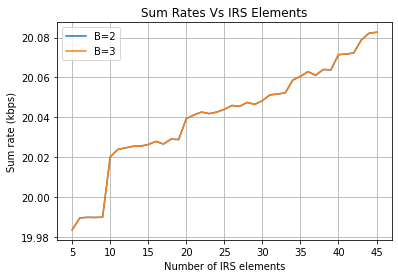

In [73]:
# # Plot the graph for each value of N
# for B, average_outage_probabilities_3 in results_dict_6.items():
#     plt.plot(N_values, average_outage_probabilities_3, label=f'B={B}')

# plt.ylabel('Average Outage Probability')
# plt.xlabel('Number of IRS elements')
# plt.title('Outage Probability Vs IRS Elements')
# plt.legend()
# plt.grid(True)
# plt.show()

# Plot the graph for each value of N
for B, sum_rates_3 in results_dict_5.items():
    plt.plot(N_values, sum_rates_3, label=f'B={B}')

plt.ylabel('Sum rate (kbps)')
plt.xlabel('Number of IRS elements')
plt.title('Sum Rates Vs IRS Elements')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Initialize the vectors
qB = np.arange(2,4,1)
N_values = np.arange(5, Ns_max + 1, 1)
RATE_THRESHOLD = 30

# Initialize an empty dictionary to store the results
results_dict_7 = {}
results_dict_8 = {}

for B in qB:
    
    # Create a set of quantized theta values
    quantized_theta_set = ((2 * np.pi * np.arange(0, 2**B, 1) / (2**B)) - np.pi)
    # print('Quantized_theta_set: ',"\n", (quantized_theta_set))
    
    average_outage_probabilities_4 = []
    sum_rates_4 = []

    for Ns in N_values:

        # Extract channel values for the current Ns value
        h_rk_ns_values = [h_rk_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, K)
        G_ns_values = [G_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)
        
        # Initialize list to store individual outage probabilities
        outage_probabilities = []
        
        # Initialize sum-rates for this case
        sum_rate_N = 0  
    
        # Perform simulations
        for s in range(NUM_SIMULATIONS):
            h_dk = h_dk_3d[s]  # Shape: (1, K)
            h_rk = h_rk_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose = np.transpose(np.conj(h_rk))  # Shape: (K, Ns)
            G = G_ns_values[s]  # Shape: (Ns, 1)

            # Initialize an empty list to store quantized theta_n values for each i
            quantized_theta_n_values_complex = []
            
            for i in range(K):
                
                beta_n = []
                quantized_theta_n_i = []
                
                for j in range(Ns):
                    theta_n = np.angle(h_rk[j][i] * G[j][0]) - np.angle(h_dk[0][i])
                    # theta_n = np.angle(h_dk[0][i]) - (np.angle(h_rk[j][i]) + np.angle(G[j][0]))
                    
                    # Find the nearest quantized theta value
                    nearest_quantized_theta = quantized_theta_set[np.argmin(np.abs(theta_n - quantized_theta_set))]
                    
                    # Adjust theta_n to lie within the range (-π, π)
                    nearest_quantized_theta_new = (nearest_quantized_theta + np.pi) % (2 * np.pi) - np.pi
            
                    quantized_theta_n_i.append(nearest_quantized_theta_new)
                    
                    beta_theta_n = ((1 - beta_min) * ((np.sin(nearest_quantized_theta_new - phi) + 1) / 2) ** k + beta_min)
                    beta_theta_n = np.clip(beta_theta_n, 0, 1)
                    beta_n.append(beta_theta_n)
                
                quantized_theta_n_values_complex.append(np.array(beta_n) * np.exp(1j * np.array(quantized_theta_n_i)))
                
            theta_n_values_complex = np.array(quantized_theta_n_values_complex)
            
            # Initialize an empty list to store diagonal matrices
            diagonal_matrices = []
            
            # Transform each row into a diagonal matrix
            for row in theta_n_values_complex:
                diagonal_matrix = np.diag(row[:Ns])
                diagonal_matrices.append(diagonal_matrix)
            
            # Convert diagonal_matrices to a NumPy array
            diagonal_matrices = np.array(diagonal_matrices)
            # print('Diagonal matrix: '"\n", (diagonal_matrices))
            # print(np.shape(diagonal_matrices))
            
            # Initialize an empty list to store the results for each column
            results_list = []
            
            # Loop over each row/user in the diagonal_matrices
            for row_index in range(diagonal_matrices.shape[0]):
                # Get the corresponding diagonal matrix for the current row/user
                single_row_diag = diagonal_matrices[row_index, :, :]
            
                # Extract the single column from f_m_transpose using indexing and transpose
                single_row = h_rk_transpose[row_index,:]
                
                # Perform the dot product between f_m_transpose (5, 10) and the current diagonal matrix (10, 10)
                result_inter = np.dot(single_row, single_row_diag)
            
                # Perform the final matrix multiplication of the result_inter (5, 10) and g (10, 1)
                result = np.dot(result_inter, G)
                results_list.append(result)
            
            # Convert the list of results into a numpy array
            results_array = np.array(results_list)
            results_array = results_array.reshape(1,K)

            # Computing the intermediate link budget (complex result)
            link_inter = []
            
            for i in range(K):
                link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i])/np.sqrt(dTU[0][i])**PATH_LOSS_EXPONENT + (results_array[0][i])/((dSU[0][i])**BETA * (dTS)**BETA)))
                link_inter.append(link_inter_value)  # Append the computed value to the list
            
            # Convert the list to a numpy array
            link_inter = np.array(np.abs(link_inter))
            link_inter_array = link_inter.reshape(1,K)
            
            # Calculate link_budget using the updated link_inter array
            link_budget = 10 * np.log10((link_inter_array)**2) + 30 
            link_budget = link_budget.reshape(1,K)
            
            #Calculate the noise value
            noise = -133 # in dBm
            
            SNR_matrix = []
            
            # Calculate SNR
            for i in range(K):
                SNR = compute_SNR(link_budget[0][i], noise)
                SNR_matrix.append(SNR)
            
            SNR_matrix = np.array(SNR_matrix)
            SNR_matrix = SNR_matrix.reshape(1,K)
            
            # Calculate rate 
            rate_matrix = compute_rate((SNR_matrix))
            rate_matrix_new = rate_matrix.flatten()
            
            # Compute sum-rate for this iteration
            sum_rate_N += np.sum(rate_matrix_new)
            
            # Compute outage probability at each iteration
            outage_probability = compute_outage_probability(K, rate_matrix_new, RATE_THRESHOLD)
            outage_probabilities.append(outage_probability)
    
        # Compute average outage probability for the current N
        average_outage_probability = compute_average_outage_probability(outage_probabilities)
        average_outage_probabilities_4.append(average_outage_probability)
        
        # Append sum-rate for this N to the list
        sum_rates_4.append(sum_rate_N/1000)
        
    # Store the results in the dictionary with N as the key
    results_dict_7[B] = sum_rates_4
    
    # Store the results in the dictionary with N as the key
    results_dict_8[B] = average_outage_probabilities_4

print('done')

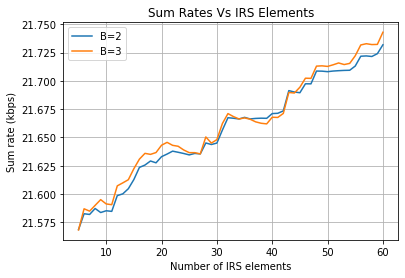

In [39]:
# # Plot the graph for each value of N
# for B, average_outage_probabilities_4 in results_dict_8.items():
#     plt.plot(N_values, average_outage_probabilities_4, label=f'B={B}')

# plt.ylabel('Average Outage Probability')
# plt.xlabel('Number of IRS elements')
# plt.title('Outage Probability Vs IRS Elements')
# plt.legend()
# plt.grid(True)
# plt.show()

# Plot the graph for each value of N
for B, sum_rates_4 in results_dict_7.items():
    plt.plot(N_values, sum_rates_4, label=f'B={B}')

plt.ylabel('Sum rate (kbps)')
plt.xlabel('Number of IRS elements')
plt.title('Sum Rates Vs IRS Elements')
plt.legend()
plt.grid(True)
plt.show()